# Flat vs Full Tire - Kaggle Classification Problem
**source:** https://www.kaggle.com/datasets/rhammell/full-vs-flat-tire-images
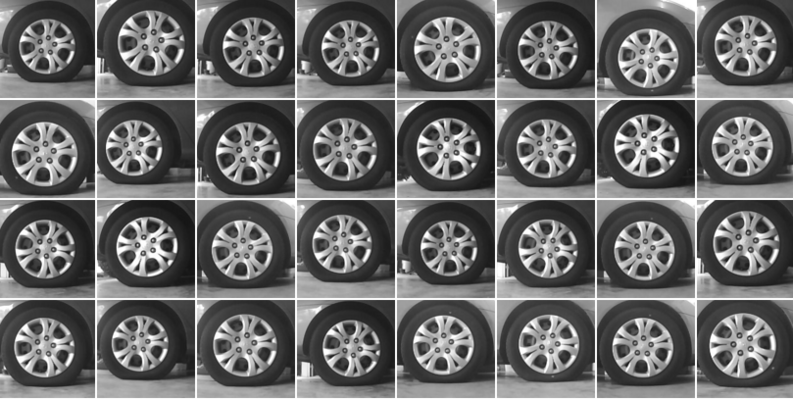

In [1]:
import os

# Math and tables
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Procesing the Tire Photos
import cv2

<div class="alert alert-block alert-info" >
<b>Wskazówka:</b> <p style="font-family: monospace">conda create --name computer_vision --clone ml </p>
</div>

# Data
- Load data.
- Check what is the material we work with?
- Split into training and test sets.

#### Load data

In [6]:
# Paths to data
FLAT_TIRE_PATH = os.path.join('data', 'flat.class')
FULL_TIRE_PATH = os.path.join('data', 'full.class')
NO_TIRE_PATH = os.path.join('data', 'no-tire.class')

In [7]:
img_path = os.path.join(FLAT_TIRE_PATH, '00000.jpg')
img = cv2.imread(img_path)

#### Check what is the material we work with?

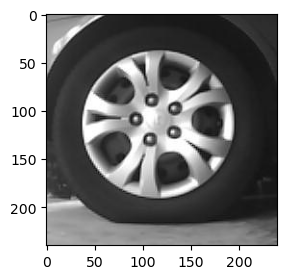

In [12]:
# Random Tire
plt.figure(figsize=(3, 3))
plt.imshow(img);

#### Conversion form .jpg to numpy arrays

In [13]:
def images_to_arrays(path) -> np.ndarray:
    """Converts images from given folder to an array of numpy arrays"""
    images = os.listdir(path)
    lst = [cv2.cvtColor(cv2.imread(os.path.join(path, img)), cv2.COLOR_BGR2GRAY) for img in images]
    return np.array(lst)

In [14]:
flat_tire_arrays = images_to_arrays(FLAT_TIRE_PATH)
full_tire_arrays = images_to_arrays(FULL_TIRE_PATH)
no_tire_arrays = images_to_arrays(NO_TIRE_PATH)

In [15]:
# Safty First!
for array in [flat_tire_arrays, full_tire_arrays, no_tire_arrays]:
    assert array.shape == (300, 240, 240)
    print(array.shape)

(300, 240, 240)
(300, 240, 240)
(300, 240, 240)


#### Split into training and test set

In [16]:
# samples = full_tire_arrays.shape[0]
#     threshold = int(300 * 0.8)
#     threshold

In [17]:
def train_test_split(threshold=0.8):
    """Returns train and test datasets based on the tree datasets provided"""
    samples = full_tire_arrays.shape[0]
    threshold = int(300 * 0.8)
    threshold
    
    x_train = np.concatenate((flat_tire_arrays[:threshold], full_tire_arrays[:threshold], no_tire_arrays[:threshold]))
    x_test = np.concatenate((flat_tire_arrays[threshold:], full_tire_arrays[threshold:], no_tire_arrays[threshold:]))
    
    # Labels:
    # 0 - flat
    # 1 - full
    # 2 - no tire
    
    y_train = np.concatenate((np.full(threshold, 0), np.full(threshold, 1), np.full(threshold, 2)))
    y_test= np.concatenate((np.full(300-threshold, 0), np.full(300-threshold, 1), np.full(300-threshold, 2)))
    
    y_train = y_train#.reshape(-1, 1)
    y_test = y_test#.reshape(-1, 1)
    
    return x_train, y_train, x_test, y_test

In [36]:
def train_val_test_split(train_size=0.7, val_size=0.15):
    """Returns train, validation and test datasets based on the tree datasets provided"""
    
    # Setup the thresholds
    test_size = 1 - train_size - val_size
    samples = full_tire_arrays.shape[0]
    
    train_threshold = int(300 * train_size)
    val_threshold = int(300 * val_size) + train_threshold
    test_threshold = int(300 * test_size) + val_threshold
    
    # Extract x_train, x_val and x_test from the original dataset
    x_train = np.concatenate(
        (flat_tire_arrays[:train_threshold], full_tire_arrays[:train_threshold], no_tire_arrays[:train_threshold])
    )
    
    x_val = np.concatenate(
        (flat_tire_arrays[train_threshold:val_threshold], full_tire_arrays[train_threshold:val_threshold], no_tire_arrays[train_threshold:val_threshold])
    )
    
    x_test = np.concatenate(
        (flat_tire_arrays[val_threshold:], full_tire_arrays[val_threshold:], no_tire_arrays[val_threshold:])
    )
    
    # Labels:
    # 0 - flat
    # 1 - full
    # 2 - no tire
    
    # Generate labels
    train_samples = int(samples * train_size)
    val_samples = int(samples * val_size)
    
    y_train = np.concatenate((np.full(train_samples, 0), np.full(train_samples, 1), np.full(train_samples, 2)))
    y_val = np.concatenate((np.full(val_samples, 0), np.full(val_samples, 1), np.full(val_samples, 2)))
    y_test= np.concatenate((np.full(val_samples, 0), np.full(val_samples, 1), np.full(val_samples, 2)))
    
    return x_train, y_train, x_val, y_val, x_test, y_test

In [37]:
x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split()

In [38]:
for dataset in [x_train, x_val, x_test]:
    print(dataset.shape)

(630, 240, 240)
(135, 240, 240)
(135, 240, 240)


In [40]:
for label in [y_train, y_val, y_test]:
    print(label.shape)

(630,)
(135,)
(135,)


#### Normalization

#### Reshaping the data

In [73]:
# Zrób testy funkcji dzielącej zbiory, czy na pewno tam się jakiś syf nie dzieje
# Sprawdź wymiary zbiorów
# Zaimpelementuj funkcję do zmieniania wymiarów macierzy z 3D od 2D w wygodny sposób
# Zwaliduj swoje predykcje

def D3_to_D2(matrix):
    """Reshapes given matrix from 3-dimensional space to a 2-dimensional space."""
    return matrix

# Training
- Checking out different models.
- Using grid seach.
- Evaluating the model.
- Data augmentation?

#### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
forest = RandomForestClassifier(random_state=2023, oob_score=True)

forest.fit(x_train_reshaped, y_train)

RandomForestClassifier(oob_score=True, random_state=2023)

In [28]:
forest.oob_score_
# Write here more about OUT OF BAG SCORE
# StatQuest: https://www.youtube.com/watch?v=J4Wdy0Wc_xQ
# YT: https://www.youtube.com/watch?v=z-w_W_VJbIY

0.9708333333333333

In [59]:

x_val_reshaped = x_val.reshape()
y_pred = forest.predict(x_val)

ValueError: Found array with dim 3. RandomForestClassifier expected <= 2.

#### Evaluation of Random Forest

In [ ]:
from sklearn.metrics import confusion_matrix

def draw_confusion_matrix(y_true, y_pred) -> None:
    """Draws the confusion matrix as a nice heatmap."""
    cm = confusion_matrix(y_true, y_pred, labels=None)
    
    sns.heatmap(data=cm, annot=True, cmap="crest")

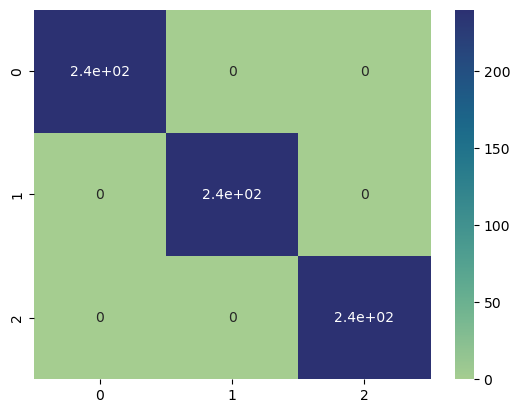

In [39]:
draw_confusion_matrix(y_train, y_pred)

# TODO
- Normalization
- Heatmap - macierz pomyłek / confussion matrix
- Nie testowanie przed funalnym końcem proejktu!

#### Final Test

In [17]:
# Uncomment to run the final test :-)
# x_test_respahed = x_test.reshape(180, -1)
# forest.score(x_test_respahed, y_test)